In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.dropna(inplace=True)

In [5]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X=data[['Id','SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=le.fit_transform(data["Species"])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
k=3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled,y_train)
predictions=knn.predict(X_test_scaled)
print(predictions)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [15]:
acc=accuracy_score(y_test,predictions)
print(acc)

1.0


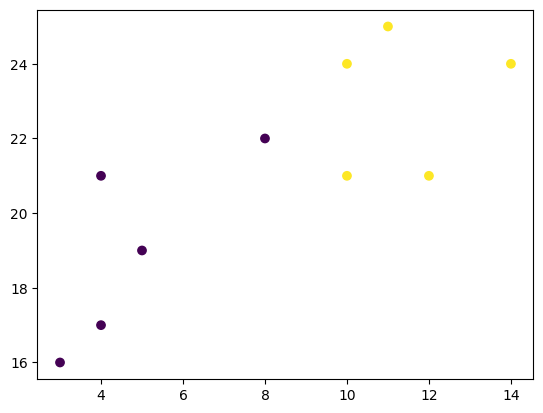

In [16]:
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x, y, c=classes)
plt.show()

In [17]:
data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(data, classes)

KNeighborsClassifier(n_neighbors=1)

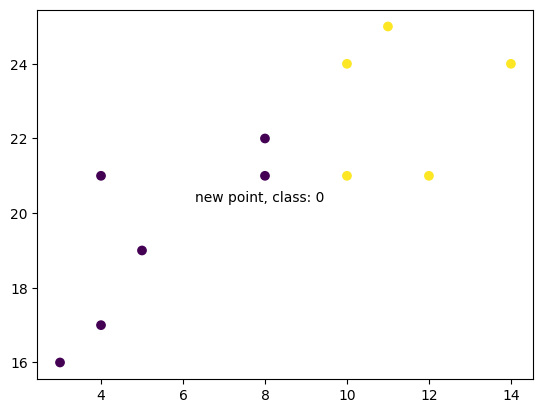

In [18]:
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

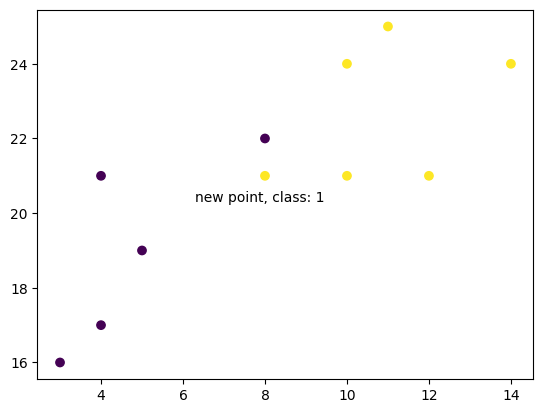

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(data, classes)

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

          PC1       PC2
0   -2.816339  0.506051
1   -2.645527 -0.651799
2   -2.879481 -0.321036
3   -2.810934 -0.577363
4   -2.879884  0.670468
..        ...       ...
145  2.424421  0.377119
146  2.164220 -0.915696
147  2.139796  0.254272
148  2.029480  0.998725
149  1.674835 -0.046213

[150 rows x 2 columns]


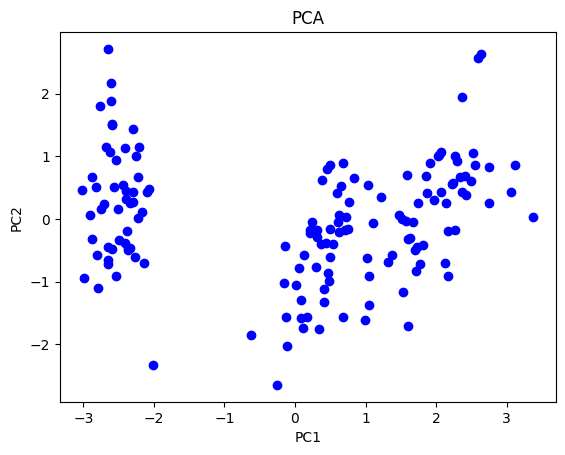

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv("Iris.csv")
X = data.drop(columns=['Species'])  # Feature
y = data['Species']  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca=PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df=pd.DataFrame(data=X_pca,columns=['PC1','PC2'])
print(pca_df)

plt.scatter(X_pca[:,0],X_pca[:,1],color='blue')
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
                    

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [28]:
data=pd.read_csv("Iris.csv")
X=data.drop(columns=["Species"])
y=data["Species"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

clf=DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa']


In [29]:
a=accuracy_score(y_test,y_pred)
print("Accuracy score:", a)

print("Classification Report:")
print(classification_report(y_test,y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy score: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


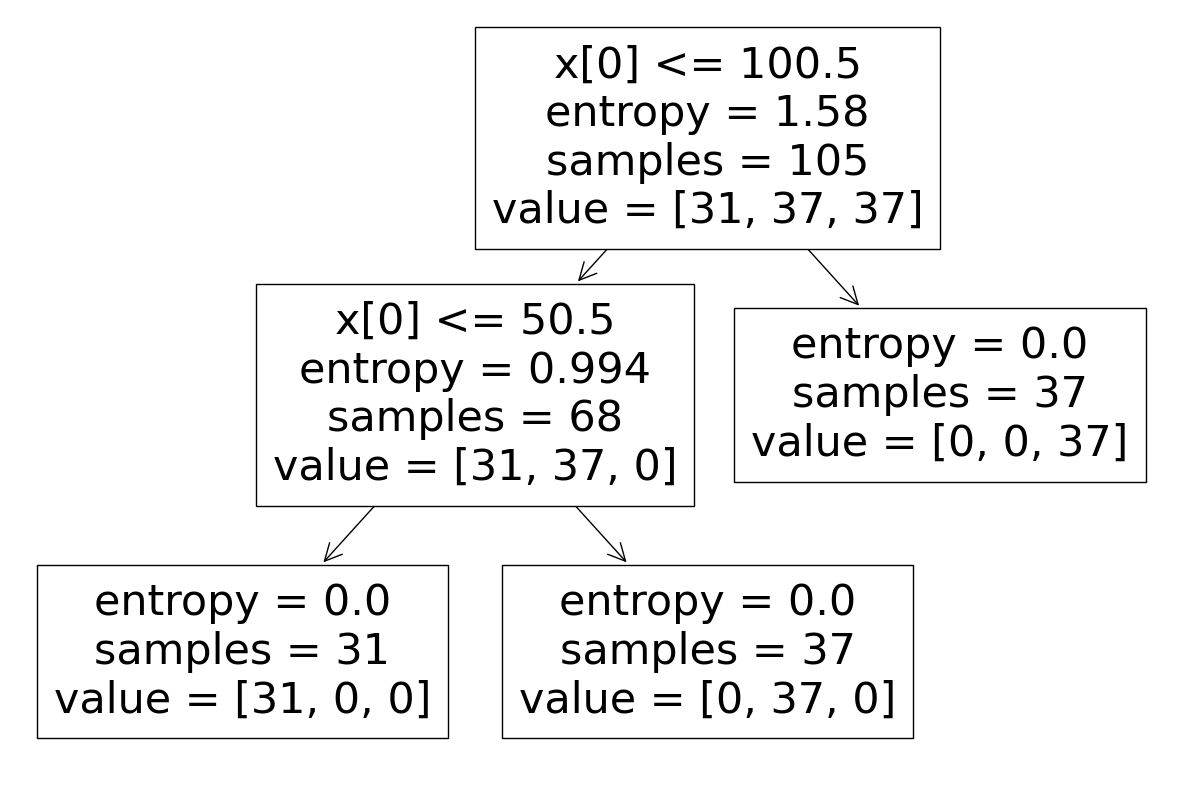

In [31]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf)
plt.show()